<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/Navie_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READ THE DATASET

In [2]:
data1 = pd.read_csv("SalaryData_Train.csv")
data2 = pd.read_csv("SalaryData_Test.csv")

In [3]:
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:

data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
data1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
data2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


**checking duplicates**

In [9]:
data1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [10]:
data2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

**get dummies**

In [11]:

data1['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [13]:
data1['workclass'] = label_encoder.fit_transform(data1['workclass'])

data1['workclass'].unique()

array([5, 4, 2, 0, 1, 3, 6])

In [14]:
data1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [15]:
data1['education'] = label_encoder.fit_transform(data1['education'])

data1['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [16]:
data1['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [17]:
data1['maritalstatus'] = label_encoder.fit_transform(data1['maritalstatus'])

data1['maritalstatus'].unique()

array([4, 2, 0, 3, 5, 1, 6])

In [18]:
data1['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:

data1['relationship'] = label_encoder.fit_transform(data1['relationship'])

data1['relationship'].unique()

array([1, 0, 5, 3, 4, 2])

In [20]:
data1['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [21]:
data1['race'] = label_encoder.fit_transform(data1['race'])

data1['race'].unique()

array([4, 2, 1, 0, 3])

In [22]:
data1['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
data1['occupation'] = label_encoder.fit_transform(data1['occupation'])

data1['occupation'].unique()

array([ 0,  3,  5,  9,  7, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [24]:
data1['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [25]:
data1['sex'] = label_encoder.fit_transform(data1['sex'])

data1['sex'].unique()

array([1, 0])

In [26]:
data1['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [27]:
data1['native'] = label_encoder.fit_transform(data1['native'])

data1['native'].unique()

array([37,  4, 21, 17, 24, 31, 14,  8,  1, 10, 18, 28, 29,  3,  0, 35,  6,
       23, 34, 13, 30,  5,  7,  9, 12, 20,  2, 33, 22, 39, 27, 26, 32, 36,
       11, 25, 38, 15, 19, 16])

In [28]:
data1['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
data1['Salary'] = label_encoder.fit_transform(data1['Salary'])

data1['Salary'].unique()

array([0, 1])

In [30]:
data2['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [31]:
data2['workclass'] = label_encoder.fit_transform(data2['workclass'])

data2['workclass'].unique()

array([2, 1, 4, 0, 5, 3, 6])

In [32]:
data2['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [33]:
data2['education'] = label_encoder.fit_transform(data2['education'])

data2['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [34]:
data2['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [35]:
data2['maritalstatus'] = label_encoder.fit_transform(data2['maritalstatus'])

data2['maritalstatus'].unique()

array([4, 2, 6, 5, 0, 3, 1])

In [36]:
data2['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [37]:
data2['relationship'] = label_encoder.fit_transform(data2['relationship'])

data2['relationship'].unique()

array([3, 0, 1, 4, 5, 2])

In [38]:
data2['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [39]:
data2['race'] = label_encoder.fit_transform(data2['race'])

data2['race'].unique()

array([2, 4, 3, 0, 1])

In [40]:
data2['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [41]:
data2['occupation'] = label_encoder.fit_transform(data2['occupation'])

data2['occupation'].unique()

array([ 6,  4, 10,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [42]:
data2['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [43]:
data2['sex'] = label_encoder.fit_transform(data2['sex'])

data2['sex'].unique()

array([1, 0])

In [44]:
data2['native'].unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [45]:
data2['native'] = label_encoder.fit_transform(data2['native'])

data2['native'].unique()

array([37, 27, 12, 24,  5, 19, 10, 28, 35, 13,  7, 31, 38, 33,  3, 22, 17,
        0, 29, 23,  8,  4, 34, 20,  1, 30,  2, 25, 14, 18, 32, 21,  6, 39,
       16, 15, 11, 36, 26,  9])

In [46]:
data2['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [47]:
data2['Salary'] = label_encoder.fit_transform(data2['Salary'])

data2['Salary'].unique()

array([0, 1])

**NO MISSING VALUE**

**OUTLIERS DETECTION**

In [48]:
data1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x79120fd3c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79120fd3ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79120fd3c1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79120fd3cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x79120fd3d210>],
 'means': []}

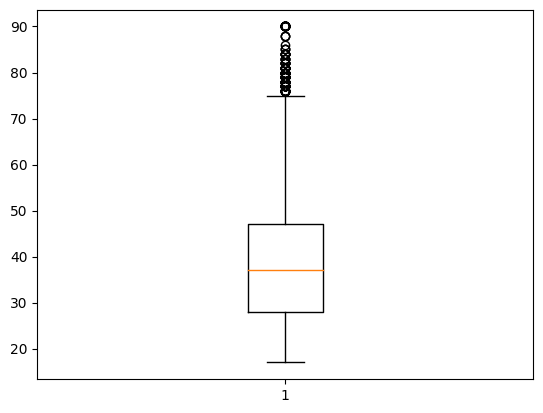

In [49]:
data_box= data1.dropna()
datal_box= data_box['age']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79120fc49300>,
 'caps': [<matplotlib.lines.Line2D at 0x79120fc49840>,
 'boxes': [<matplotlib.lines.Line2D at 0x79120fc49000>],
 'medians': [<matplotlib.lines.Line2D at 0x79120fc49c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79120fc49f00>],
 'means': []}

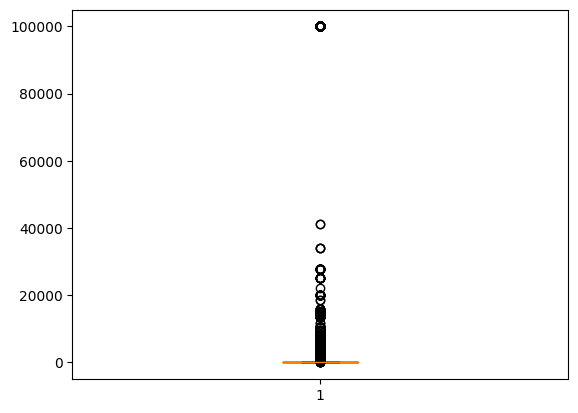

In [50]:
data_box= data1.dropna()
datal_box= data_box['capitalgain']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79120fc97fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x79120fccc520>,
 'boxes': [<matplotlib.lines.Line2D at 0x79120fc97d00>],
 'medians': [<matplotlib.lines.Line2D at 0x79120fccca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79120fcccd00>],
 'means': []}

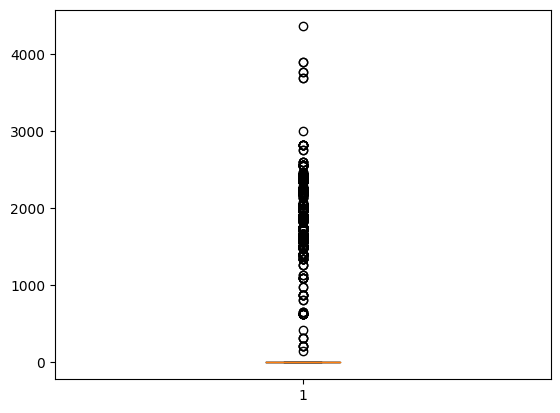

In [51]:
data_box= data1.dropna()
datal_box= data_box['capitalloss']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79120830a170>,
 'caps': [<matplotlib.lines.Line2D at 0x79120830a6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x791208309ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x79120830abf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79120830ae90>],
 'means': []}

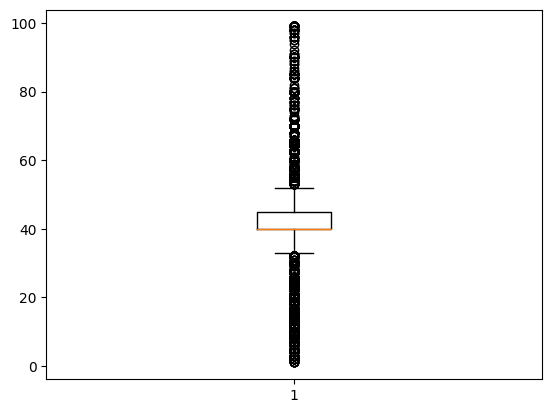

In [52]:
data_box= data1.dropna()
datal_box= data_box['hoursperweek']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79120838cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x79120838d480>,
 'boxes': [<matplotlib.lines.Line2D at 0x79120838cdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x79120838d9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79120838dc60>],
 'means': []}

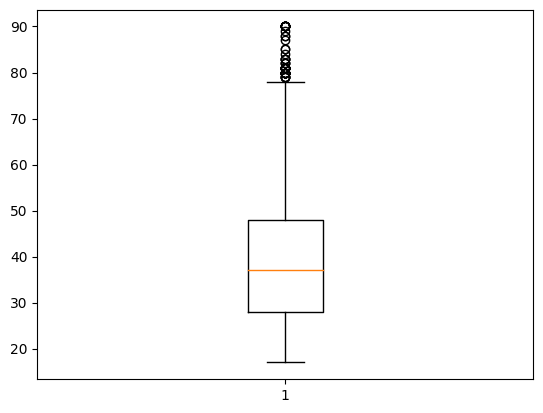

In [53]:
data_box= data2.dropna()
datal_box= data_box['age']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x791208211300>,
 'caps': [<matplotlib.lines.Line2D at 0x791208211840>,
 'boxes': [<matplotlib.lines.Line2D at 0x791208211060>],
 'medians': [<matplotlib.lines.Line2D at 0x791208211d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7912083dd2a0>],
 'means': []}

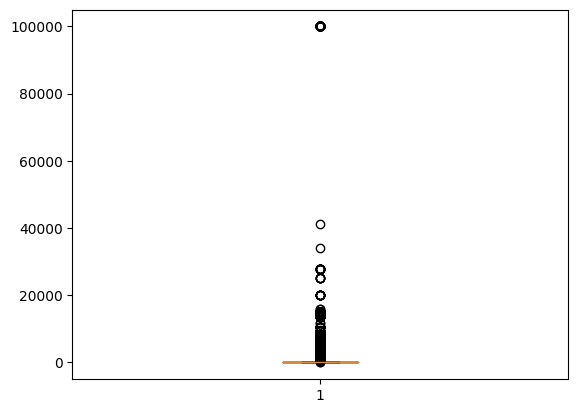

In [54]:
data_box= data2.dropna()
datal_box= data_box['capitalgain']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x791208277d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7912083bf1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x791208277a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7912082a4520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7912082a47c0>],
 'means': []}

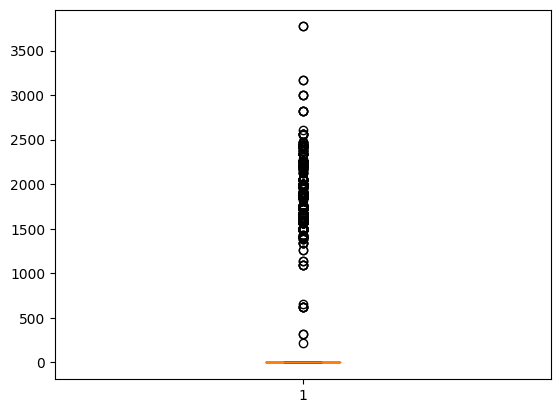

In [55]:
data_box= data2.dropna()
datal_box= data_box['capitalloss']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7912080ebcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x791208212020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7912080eb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x791208120160>],
 'fliers': [<matplotlib.lines.Line2D at 0x791208120400>],
 'means': []}

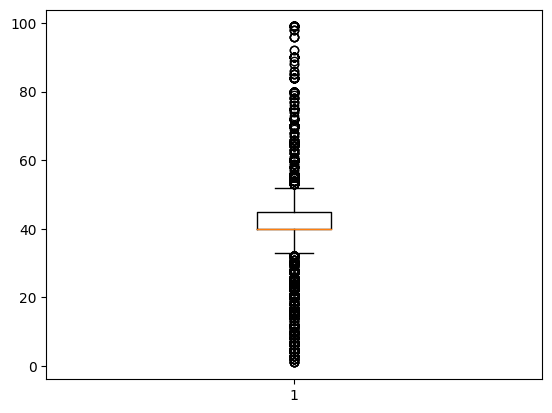

In [56]:
data_box= data2.dropna()
datal_box= data_box['hoursperweek']
plt.boxplot(datal_box)

**correlation analysis**

In [57]:
#import seaborn as sns
#sns.pairplot(data1)
#plt.suptitle('pairplot for all numeric values' , y=1.01, fontsize=17)


In [58]:
data1.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


In [59]:
#import seaborn as sns
#sns.pairplot(data2)
#plt.suptitle('pairplot for all numeric values' , y=1.01, fontsize=17)


In [60]:
data2.corr()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065,0.085554
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188,0.327813
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311,0.046218
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500,-0.258335
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514,0.069227
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178,0.213863
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923,0.220882


#**Feature Selection using pps**

In [61]:
train = pd.read_csv("SalaryData_Train.csv")

In [62]:
!pip install ppscore

In [63]:
import ppscore as pps

In [64]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [65]:
pps.score(train, 'age','Salary')

{'x': 'age',
 'y': 'Salary',
 'ppscore': 0.0275250998812985,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.652949523016713,
 'model': DecisionTreeClassifier()}

In [66]:
pps.score(train, 'educationno','Salary')

{'x': 'educationno',
 'y': 'Salary',
 'ppscore': 0.23669934850392518,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7275982597072357,
 'model': DecisionTreeClassifier()}

In [67]:
pps.score(train, 'capitalgain','Salary')

{'x': 'capitalgain',
 'y': 'Salary',
 'ppscore': 0.2953947646508876,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7485450956287072,
 'model': DecisionTreeClassifier()}

In [68]:
pps.score(train, 'capitalloss','Salary')

{'x': 'capitalloss',
 'y': 'Salary',
 'ppscore': 0.12713116190091397,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.688496282455044,
 'model': DecisionTreeClassifier()}

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
pps.score(train, 'workclass','Salary')

{'x': 'workclass',
 'y': 'Salary',
 'ppscore': 0.09274449232713386,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6762245928967938,
 'model': DecisionTreeClassifier()}

In [71]:
pps.score(train, 'occupation','Salary')

{'x': 'occupation',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [72]:
pps.score(train, 'education','Salary')

{'x': 'education',
 'y': 'Salary',
 'ppscore': 0.23669934850392518,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7275982597072357,
 'model': DecisionTreeClassifier()}

In [73]:
pps.score(train, 'maritalstatus','Salary')


{'x': 'maritalstatus',
 'y': 'Salary',
 'ppscore': 0.0007704246352128015,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6434014896386242,
 'model': DecisionTreeClassifier()}

In [74]:
pps.score(train, 'relationship','Salary')

{'x': 'relationship',
 'y': 'Salary',
 'ppscore': 0.11745970434947131,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6850447959889747,
 'model': DecisionTreeClassifier()}

In [75]:
pps.score(train, 'race','Salary')

{'x': 'race',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [76]:
pps.score(train, 'sex','Salary')

{'x': 'sex',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [77]:
pps.score(train, 'native','Salary')

{'x': 'native',
 'y': 'Salary',
 'ppscore': 0.0058121384503757294,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6452007434642519,
 'model': DecisionTreeClassifier()}

occupation,sex,race,maritalstatus has less value ppscore hence delete those columns

In [78]:
data1.drop('occupation',axis=1,inplace=True)
data2.drop('occupation',axis=1,inplace=True)

In [79]:
data1.drop('race',axis=1,inplace=True)
data2.drop('race',axis=1,inplace=True)

In [80]:
data1.drop('sex',axis=1,inplace=True)
data2.drop('sex',axis=1,inplace=True)

In [81]:
data1.drop('maritalstatus',axis=1,inplace=True)
data2.drop('maritalstatus',axis=1,inplace=True)

**SPLIT THE DATA**

In [82]:
X_train = data1.drop(['Salary'],axis=1)
y_train = data1[['Salary']]

In [83]:
X_test = data2.drop(['Salary'],axis=1)
y_test = data2[['Salary']]

In [84]:

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30161, 9), (15060, 9), (30161, 1), (15060, 1))

**BUILD THE MODEL**

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [90]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [91]:
x_train = norm_func(X_train)
x_test =  norm_func(X_test)

In [93]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
train_pred_multi=model.fit(x_train,y_train)


In [94]:
predicted = model.predict(x_train)

In [96]:
confusion_matrix(y_train,predicted)

array([[22651,     2],
       [ 7360,   148]])

In [97]:
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.99      0.02      0.04      7508

    accuracy                           0.76     30161
   macro avg       0.87      0.51      0.45     30161
weighted avg       0.81      0.76      0.66     30161



In [98]:
model=MultinomialNB()
train_pred_multi=model.fit(x_test,y_test)

In [99]:
predicted = model.predict(x_test)

In [100]:

confusion_matrix(y_test,predicted)


array([[11359,     1],
       [ 3619,    81]])

In [101]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11360
           1       0.99      0.02      0.04      3700

    accuracy                           0.76     15060
   macro avg       0.87      0.51      0.45     15060
weighted avg       0.81      0.76      0.66     15060



In [102]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [103]:
train_pred_gau=model.fit(x_train,y_train)

In [104]:
predicted = model.predict(x_train)

In [105]:
confusion_matrix(y_train,predicted)

array([[21509,  1144],
       [ 5183,  2325]])

In [106]:
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     22653
           1       0.67      0.31      0.42      7508

    accuracy                           0.79     30161
   macro avg       0.74      0.63      0.65     30161
weighted avg       0.77      0.79      0.76     30161

